In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline

In [2]:
os.chdir(r"D:/STUDY/content/Andrew Ng/machine-learning-ex7/machine-learning-ex7/ex7")

In [3]:
data1 = loadmat("ex7data2.mat")

In [4]:
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [5]:
df = pd.DataFrame(data1['X'],columns=['x', 'y'])
df.head()

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


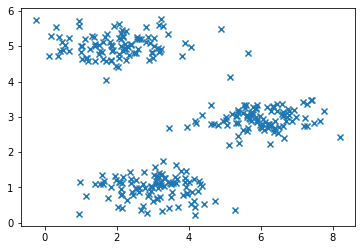

In [6]:
plt.scatter(df.x, df.y, marker='x')

###  Helping Functions

In [7]:
def RandomInitialization(df,k):
    random_points = np.random.random_integers(0,df.shape[0], k) #pick three random indices from X
    random_centroids = np.array([df.iloc[idx,:] for idx in random_points])
    return random_centroids

[[1.36678395 5.26161095]
 [1.85382737 5.00752482]
 [4.95679428 2.89776297]]


C:\softwares\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 300 + 1) instead
  


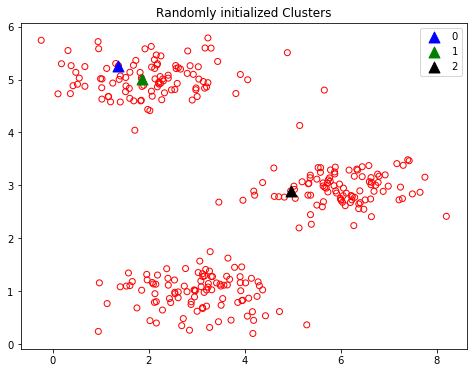

In [10]:
init_centroids = RandomInitialization(df,k=3)
print(init_centroids)
plot_init_centroid_assignments(df,init_centroids)

In [11]:
def plot_init_centroid_assignments(df, init_centroids):
    plt.figure(figsize=(8,6))
    plt.scatter(df.x, df.y, marker='o', facecolors='none',edgecolors='red')
    plt.scatter(init_centroids[0][0],init_centroids[0][1], marker='^',c='blue',s=120,label="0")
    plt.scatter(init_centroids[1][0],init_centroids[1][1],marker='^',c="green",s=120,label="1")
    plt.scatter(init_centroids[2][0],init_centroids[2][1],marker='^',c="black",s=120,label="2")
    plt.title("Randomly initialized Clusters")
    plt.legend()
    plt.show()
    

In [12]:
def ClusterAssignment(df, centroids, k):
    n_samples = df.shape[0]
    distance_from_cluster = {i:0 for i in range(1,k)}
    assigned_cluster = np.zeros(n_samples)
    
    for sample in range(n_samples):
        for j in range(len(centroids)):
            x_diff = df.iloc[sample,0] - centroids[j][0]
            y_diff = df.iloc[sample,1] - centroids[j][1]
            distance = np.sqrt((x_diff**2) + (y_diff**2))
            distance_from_cluster[j] = distance
            
        assigned_cluster[sample] = min(distance_from_cluster, key=distance_from_cluster.get)
    
    df["Cluster_idx"] = assigned_cluster
    
    return df

def updated_plot(df,centroids):
    plt.figure(figsize=(8,6))
    sns.scatterplot(df.x, df.y, hue=df.Cluster_idx,
                    legend='full', palette={0.0:'blue', 1.0:'green', 2.0:'black'})
    plt.scatter(centroids[0][0],centroids[0][1], marker='^',c='red',s=120)
    plt.scatter(centroids[1][0],centroids[1][1],marker='^',c="red",s=120)
    plt.scatter(centroids[2][0],centroids[2][1],marker='^',c="red",s=120)
    plt.show()
    
def MoveCentroids(df):
    centroids = df.groupby(by="Cluster_idx").mean().values
    return centroids

## Kmeans

In [13]:

def k_means(df,n_iterations,k):
    # Random Initialization of k cluster centroids
    centroids = RandomInitialization(df,k)
    print(centroids)
    plot_init_centroid_assignments(df, init_centroids=centroids)

    for i in range(n_iterations):
        print("ITERATION", i+1)
        df = ClusterAssignment(df, centroids, k)
        updated_plot(df,centroids)
        
        centroids = MoveCentroids(df)
       # if updated_centroids - centroids
        

[[4.43152976 0.54041   ]
 [4.1877442  2.89283463]
 [6.77012767 3.21411422]]


C:\softwares\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 300 + 1) instead
  


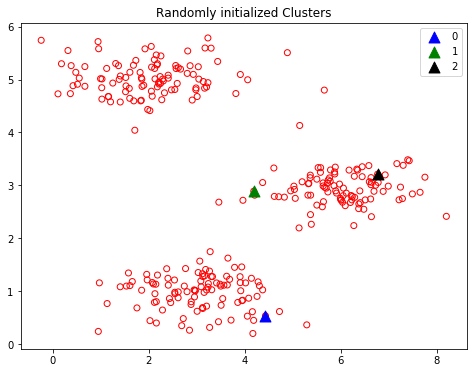

ITERATION 1


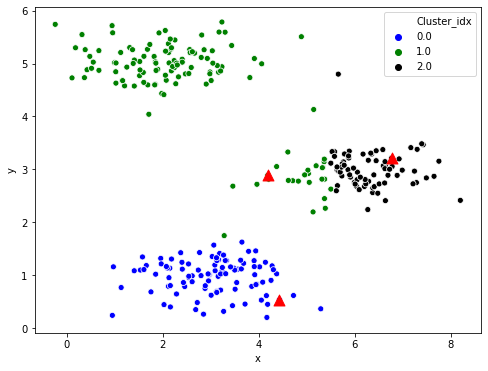

ITERATION 2


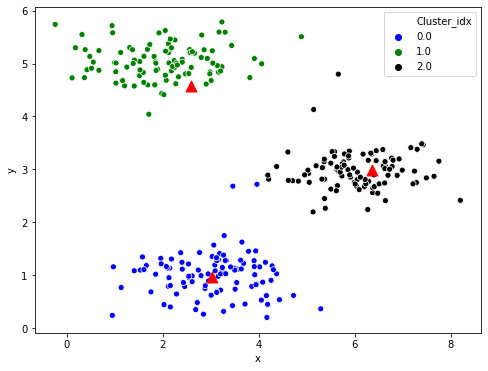

ITERATION 3


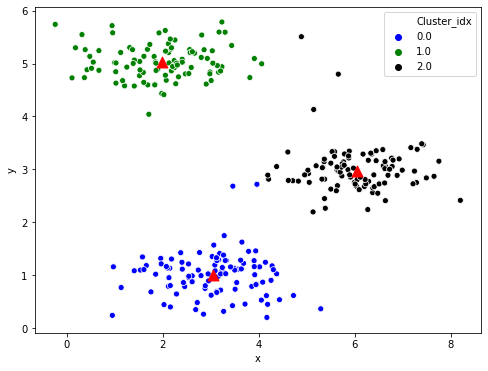

ITERATION 4


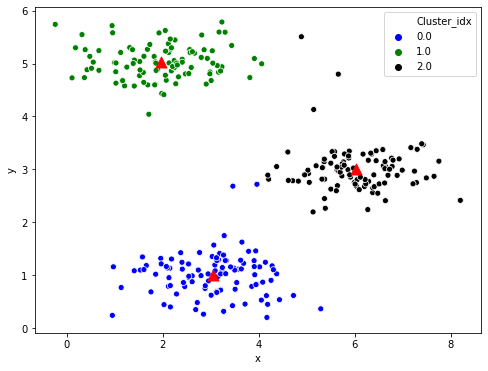

ITERATION 5


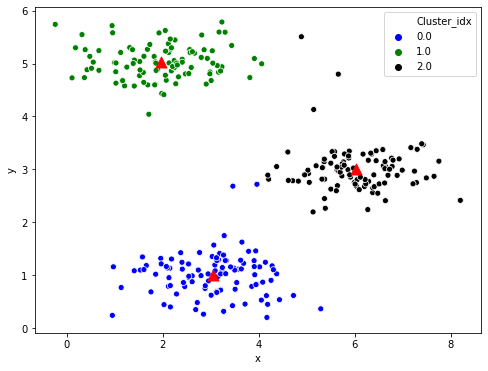

ITERATION 6


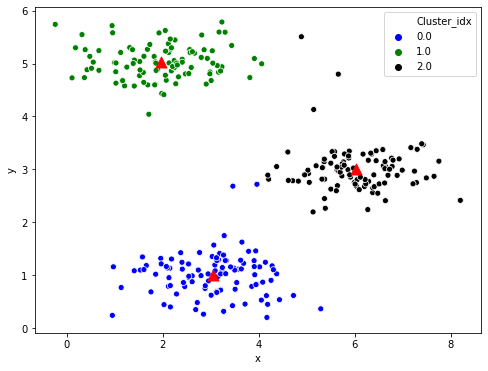

ITERATION 7


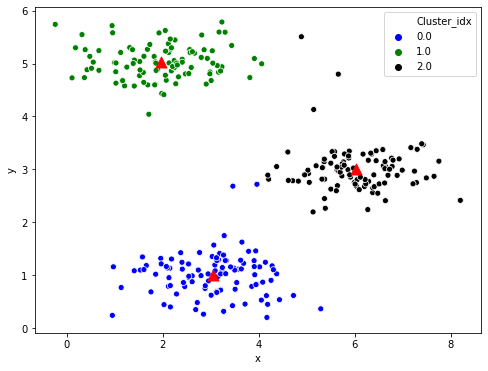

ITERATION 8


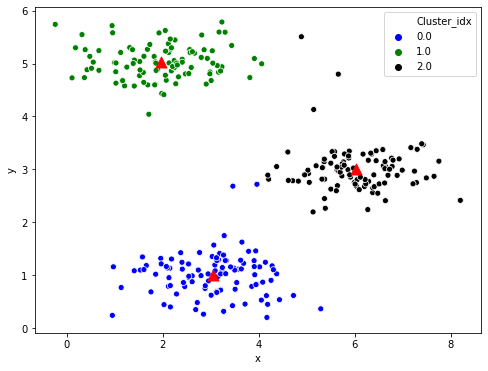

ITERATION 9


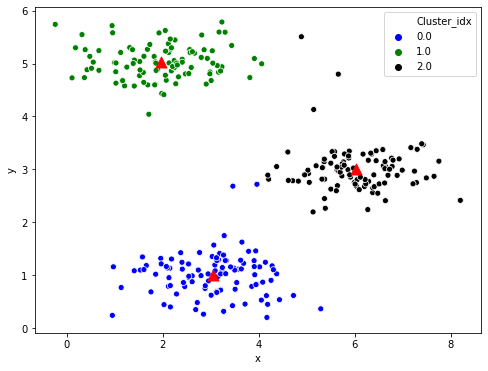

ITERATION 10


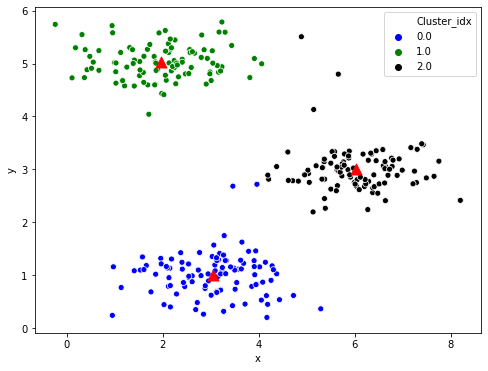

In [14]:
k_means(df,n_iterations=10, k=3)

In [48]:
from sklearn.datasets import load_iris

In [74]:
iris = load_iris()
iris_X , iris_y = iris['data'][:,2:], iris['target']

In [75]:
iris_X.shape , iris_y.shape

((150, 2), (150,))

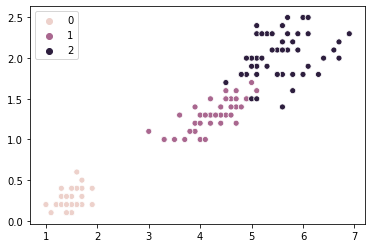

In [76]:
sns.scatterplot(iris_X[:,0], iris_X[:,1],hue=iris_y)

In [77]:
iris_X = pd.DataFrame(iris_X, columns=['x','y'])

In [69]:
from sklearn.cluster import k_means

In [78]:
iris_X.isnull().sum()

x    0
y    0
dtype: int64

In [79]:
iris_X

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [80]:
k_means(iris_X, 10)

(array([[1.325     , 0.21666667],
        [4.06666667, 1.24444444],
        [5.        , 1.80588235],
        [5.79230769, 2.3       ],
        [6.6       , 2.06666667],
        [3.41428571, 1.05714286],
        [4.58695652, 1.43913043],
        [5.275     , 2.225     ],
        [5.7375    , 1.7375    ],
        [1.58846154, 0.27307692]]),
 array([0, 0, 0, 9, 0, 9, 0, 9, 0, 9, 9, 9, 0, 0, 0, 9, 0, 0, 9, 9, 9, 9,
        0, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 9,
        9, 0, 9, 0, 9, 0, 6, 6, 6, 1, 6, 6, 6, 5, 6, 1, 5, 1, 1, 6, 5, 6,
        6, 1, 6, 1, 2, 1, 6, 6, 1, 6, 6, 2, 6, 5, 1, 5, 1, 2, 6, 6, 6, 6,
        1, 1, 6, 6, 1, 5, 1, 1, 1, 1, 5, 1, 3, 2, 3, 8, 3, 4, 6, 4, 8, 3,
        2, 2, 7, 2, 7, 7, 8, 4, 4, 2, 3, 2, 4, 2, 3, 8, 2, 2, 3, 8, 8, 4,
        3, 2, 8, 3, 3, 8, 2, 7, 3, 7, 2, 3, 3, 7, 2, 7, 7, 2]),
 5.626529803671746)